<a href="https://colab.research.google.com/github/kovyakov/Sketchbook/blob/master/An%C3%A1lise_sobre_vagas_de_empregos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U sklearn
!pip install wordcloud nltk dtale

     |████████████████████████████████| 12.7 MB 45 kB/s 
     |████████████████████████████████| 210 kB 47.6 MB/s 
     |████████████████████████████████| 62 kB 535 kB/s 
     |████████████████████████████████| 40 kB 1.9 MB/s 
     |████████████████████████████████| 47 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 45.4 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
     |████████████████████████████████| 9.5 MB 37.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.1 MB/s 
     |████████████████████████████████| 9.6 MB 29.1 MB/s 
     |████████████████████████████████| 642 kB 30.1 MB/s 
     |████████████████████████████████| 79.9 MB 127 kB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 357 kB 55.1 MB/s 
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62590 sha256=a61e59d2d4200b547adb21176e9c9badc1be4f703b37341549594883f3f4739e
  Stored in directory: /roo

In [ ]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Pós Live/MIT de Inteligencia Artificial e Machine Learning/202204 - Processamento de linguagem natural com Python/notebooks/data/20220316 - Vagas para Cientista e Analista de Dados.xlsx")

In [ ]:
data.shape

(51, 8)

In [ ]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True

In [ ]:
dtale.show(data)

https://cvcqcfy9l0s-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [ ]:
data = data.reset_index().drop('index', axis=1, errors='ignore')
data.columns = [str(c) for c in data.columns]  # update columns to strings in case they are numbers

data = data[[c for c in data.columns if c not in ['n']]]
data.at[40, 'Área'] = 'Cientista de Dados'
data.at[38, 'Área'] = 'Engenharia de dados'
data.at[46, 'Área'] = 'Análise de dados'
data.at[47, 'Área'] = 'Engenharia de Dados'
data.at[48, 'Área'] = 'Engenharia de Dados'
data.at[45, 'Área'] = 'Ciência de dados '
data.at[41, 'Área'] = 'Ciência de dados'
data.at[42, 'Área'] = 'Análise de dados'
data.at[43, 'Área'] = 'Ciência de dados'
data.at[44, 'Área'] = 'Ciência de dados'
data.at[49, 'Área'] = 'Análise de dados'
data.at[50, 'Área'] = 'Análise de dados'
data.at[40, 'Área'] = 'Ciência de dados'
data.at[39, 'Área'] = 'Engenharia de dados'

In [ ]:
def clean_text(text):
    return text.lower().strip()

data["Área"] = data["Área"].apply(clean_text)

data["Área"].value_counts()

ciência de dados       21
análise de dados       21
engenharia de dados     9
Name: Área, dtype: int64

In [ ]:
dtale.show(data)

https://cvcqcfy9l0s-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

In [ ]:
data["Idioma"] = ["pt"] * data.shape[0]

data.columns = [str(c) for c in data.columns]  # update columns to strings in case they are numbers

data.at[10, 'Idioma'] = 'en'
data.at[11, 'Idioma'] = 'en'
data.at[13, 'Idioma'] = 'en'
data.at[15, 'Idioma'] = 'en'
data.at[16, 'Idioma'] = 'en'
data.at[17, 'Idioma'] = 'en'
data.at[20, 'Idioma'] = 'en'
data.at[21, 'Idioma'] = 'en'
data.at[23, 'Idioma'] = 'en'
data.at[24, 'Idioma'] = 'en'
data.at[29, 'Idioma'] = 'en'
data.at[31, 'Idioma'] = 'en'
data.at[32, 'Idioma'] = 'en'
data.at[33, 'Idioma'] = 'en'
data.at[34, 'Idioma'] = 'en'
data.at[50, 'Idioma'] = 'en'
data.at[47, 'Idioma'] = 'en'
data.at[46, 'Idioma'] = 'en'
data.at[45, 'Idioma'] = 'en'

In [ ]:
jobs_pt = data[data['Idioma'] == "pt"]
description_pt = jobs_pt["Descrição"]

In [ ]:
import nltk 
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

def get_words(text):
    text = text.lower().strip()
    tokens = nltk.word_tokenize(text)
    words  = [token for token in tokens if token.isalpha()]
    return ' '.join(words)

description_pt = description_pt.apply(get_words)

(-0.5, 799.5, 799.5, -0.5)

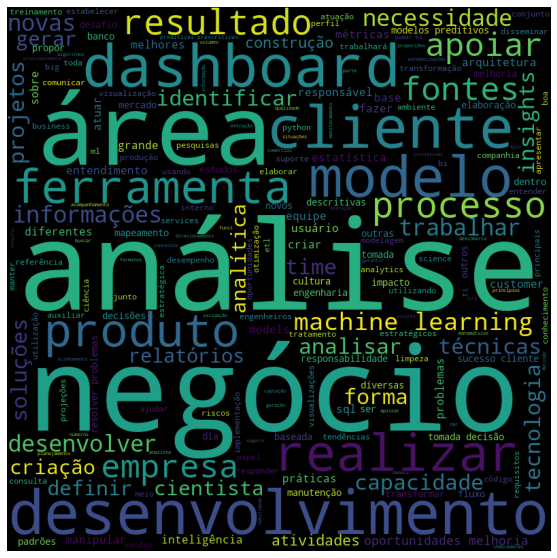

In [ ]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stopwords_pt = nltk.corpus.stopwords.words("portuguese")
stopwords_en = nltk.corpus.stopwords.words("english")
stopwords_pt.extend(["dados", "dado", "data", "através"])
stopwords_pt.extend(stopwords_en)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
wordcloud = WordCloud(stopwords=stopwords_pt,
                      height=800,
                     width=800).generate(' '.join(description_pt))
ax.imshow(wordcloud)
ax.axis("off")

In [ ]:
fields = data["Área"].unique()
fields 

array(['ciência de dados', 'análise de dados', 'engenharia de dados'],
      dtype=object)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
for idx, field in enumerate(fields.sort()):
    selection = jobs_pt[jobs_pt["Área"] == field]
    description_selection_pt = selection["Descrição"]
    description_selection_pt.apply(get_words)
    wordcloud = WordCloud(stopwords=stopwords_pt,
                          height=800,
                          width=800).generate(' '.join(description_selection_pt))
    axes[idx].imshow(wordcloud)
    axes[idx].axis("off")
    axes[idx].set_title(field)

NameError: ignored